<a href="https://colab.research.google.com/github/md-marop-hossain/Ocular-Disease-Recognition-Project-CSE499A/blob/main/Ocular_disease_project_CSE499A_NasNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Google Drive in Colab for Seamless Data Access**






In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Setting Up Kaggle API in Google Colab and Downloading Eye Diseases Classification Dataset**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle .josn to folder created
! cp kaggle.json ~/.kaggle/
#permission for the json the act
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
! unzip eye-diseases-classification

Saving kaggle.json to kaggle.json
ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          28948        874  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37           3176         82  1.0              
asaniczka/us-cost-of-living-dataset-3171-counties          US Cost of Living Dataset (1877 Counties)       1MB  2023-10-08 15:47:47            609         30  1.0              
mabelhsu/api-clean-top-1000-youtubers-statistics           Clean Top 1000 Youtube

### **Data Visualization with NumPy, Pandas, Matplotlib, and Seaborn**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

### **Number of images in dataset:**

In [ ]:
import fnmatch
import os

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


### **Image dimensions, properties:**

In [ ]:
from PIL import Image

In [ ]:
# load example image
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


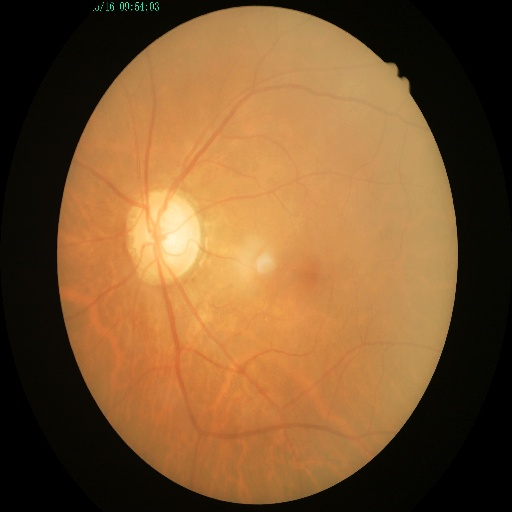

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


### **Image hashing**

***To identify any duplicate images***

In [ ]:
import hashlib
import glob

In [ ]:
def img_hash(images, dir): # dir is string of subdirectory
    # https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
    hash_list = [] # list of tuples (filename, hash)
    for image in images:
      with open(image, "rb") as f:
          hash = hashlib.blake2b(f.read()).hexdigest() # extract hash code
          filename = os.path.basename(image) # extract subdirectory and filename
          dir_filename = os.path.join(dir, filename)
          hash_list.append((dir_filename, hash))
          hash_df = pd.DataFrame(hash_list, columns=['filename','hash']) # dataframe of filenames & hashes
    return hash_df

In [ ]:
# hash cataract images
cataract_imgs = glob.glob("./dataset/cataract/*.*")
print(img_hash(images = cataract_imgs, dir='cataract')[:3]) # check format
# assign object to list
cataract_hashdf = img_hash(images = cataract_imgs, dir='cataract')

                    filename  \
0     cataract/1968_left.jpg   
1  cataract/_238_9445598.jpg   
2  cataract/_217_8865645.jpg   

                                                hash  
0  2ca93861c27a9fd3c9ed803e5c0a2655e439ba7fe3497b...  
1  2dcacb5f1f291c70a63c89bd41076fb652726aabc2935f...  
2  17c9b3904f3ad33622cfb8b48c1dd5d3e436ee7e462a84...  


In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
# join all the hash dataframes together
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
# check hash_list count # should be 4217
len(hash_df)

4217

#### **Search for duplicate hash codes:**

In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] # based on hash codes only
print("Duplicate images based on hashcodes:")
print(duplicate_hashes) # 2 duplicate hashes

Duplicate images based on hashcodes:
                     filename  \
292     cataract/625_left.jpg   
1028  cataract/1415_right.jpg   
2411    glaucoma/625_left.jpg   
3126  glaucoma/1415_right.jpg   

                                                   hash  
292   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
1028  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2411  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
3126  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  


##**Visualise preprocessed images**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) #2.8.2

2.13.0


**What happens after resizing and rescaling:**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(160,160) ,  # needs to be symmetrical
    layers.Rescaling(1./255) # desired height, width in model pipeline
])

result = resize_and_rescale(pixels)
print(result.shape) # new shape, channels

(160, 160, 3)


**What happens to image pixel values after rescaling:**

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


**Show images before and after preprocessing:**

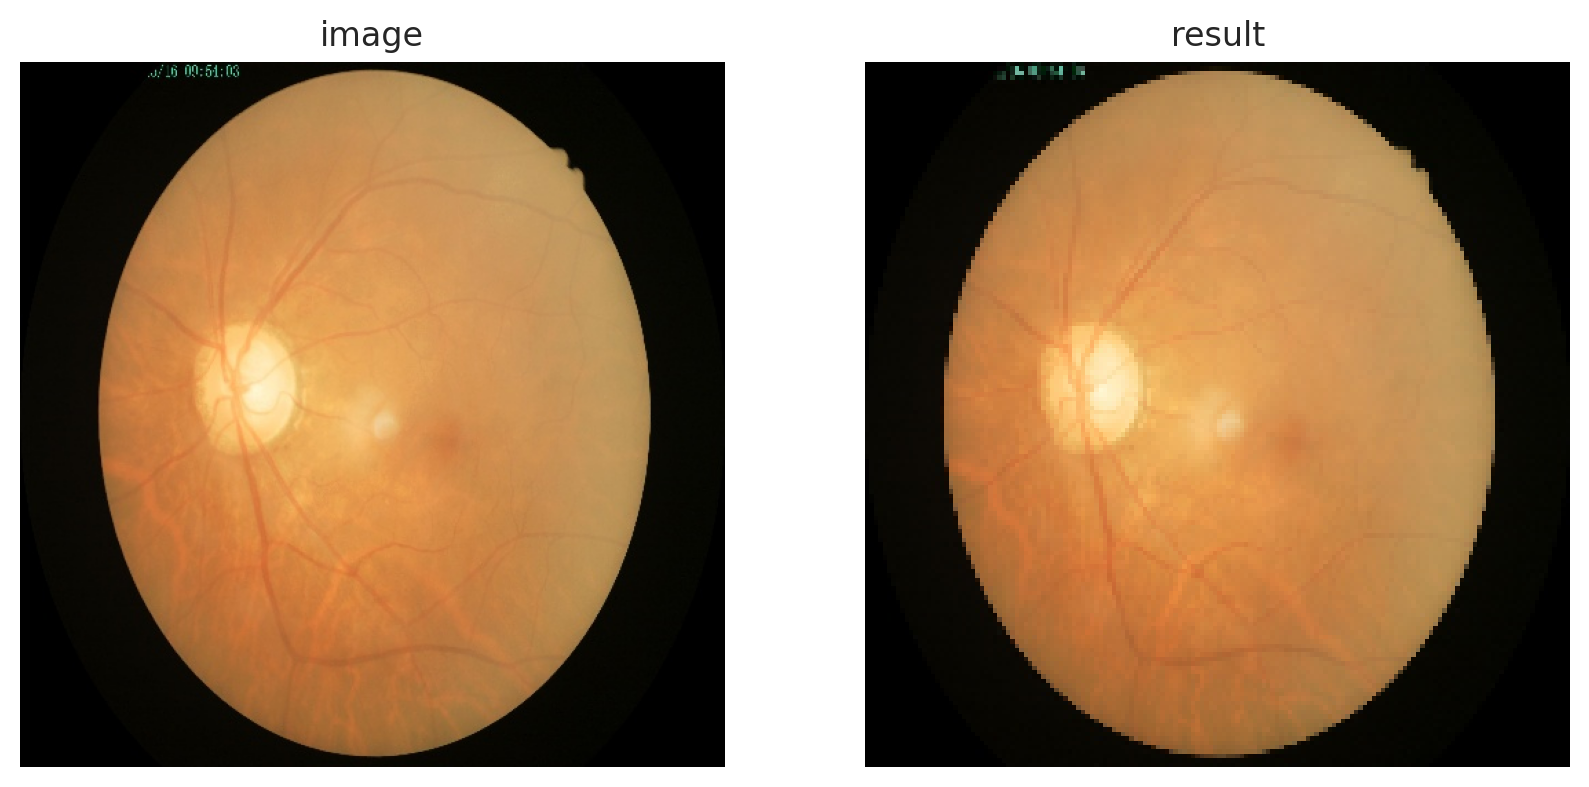

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
# after pixel normalisation
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() # result seems to have slight blurring of image, but still good definition

## **Create train, validation and test datasets**

In [ ]:
!pip install split-folders

In [ ]:
# first allocate a test set using this library
import splitfolders
splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

Copying files: 4217 files [00:00, 4435.03 files/s]


In [ ]:
# generate dataset that can be used for machine learning
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) # very important to get this right, will determine model success
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    #labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2108 files belonging to 4 classes.
Found 1052 files belonging to 4 classes.
Found 1057 files belonging to 4 classes.


In [ ]:
# preview of how images are labelled
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


### **Visualise images and labels together**

In [ ]:
# visualise label format # one-hot encoded
for _, labels in train_ds.take(1):
  print(labels[0])
  print(tf.argmax(labels[0], axis=0))
  break

tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


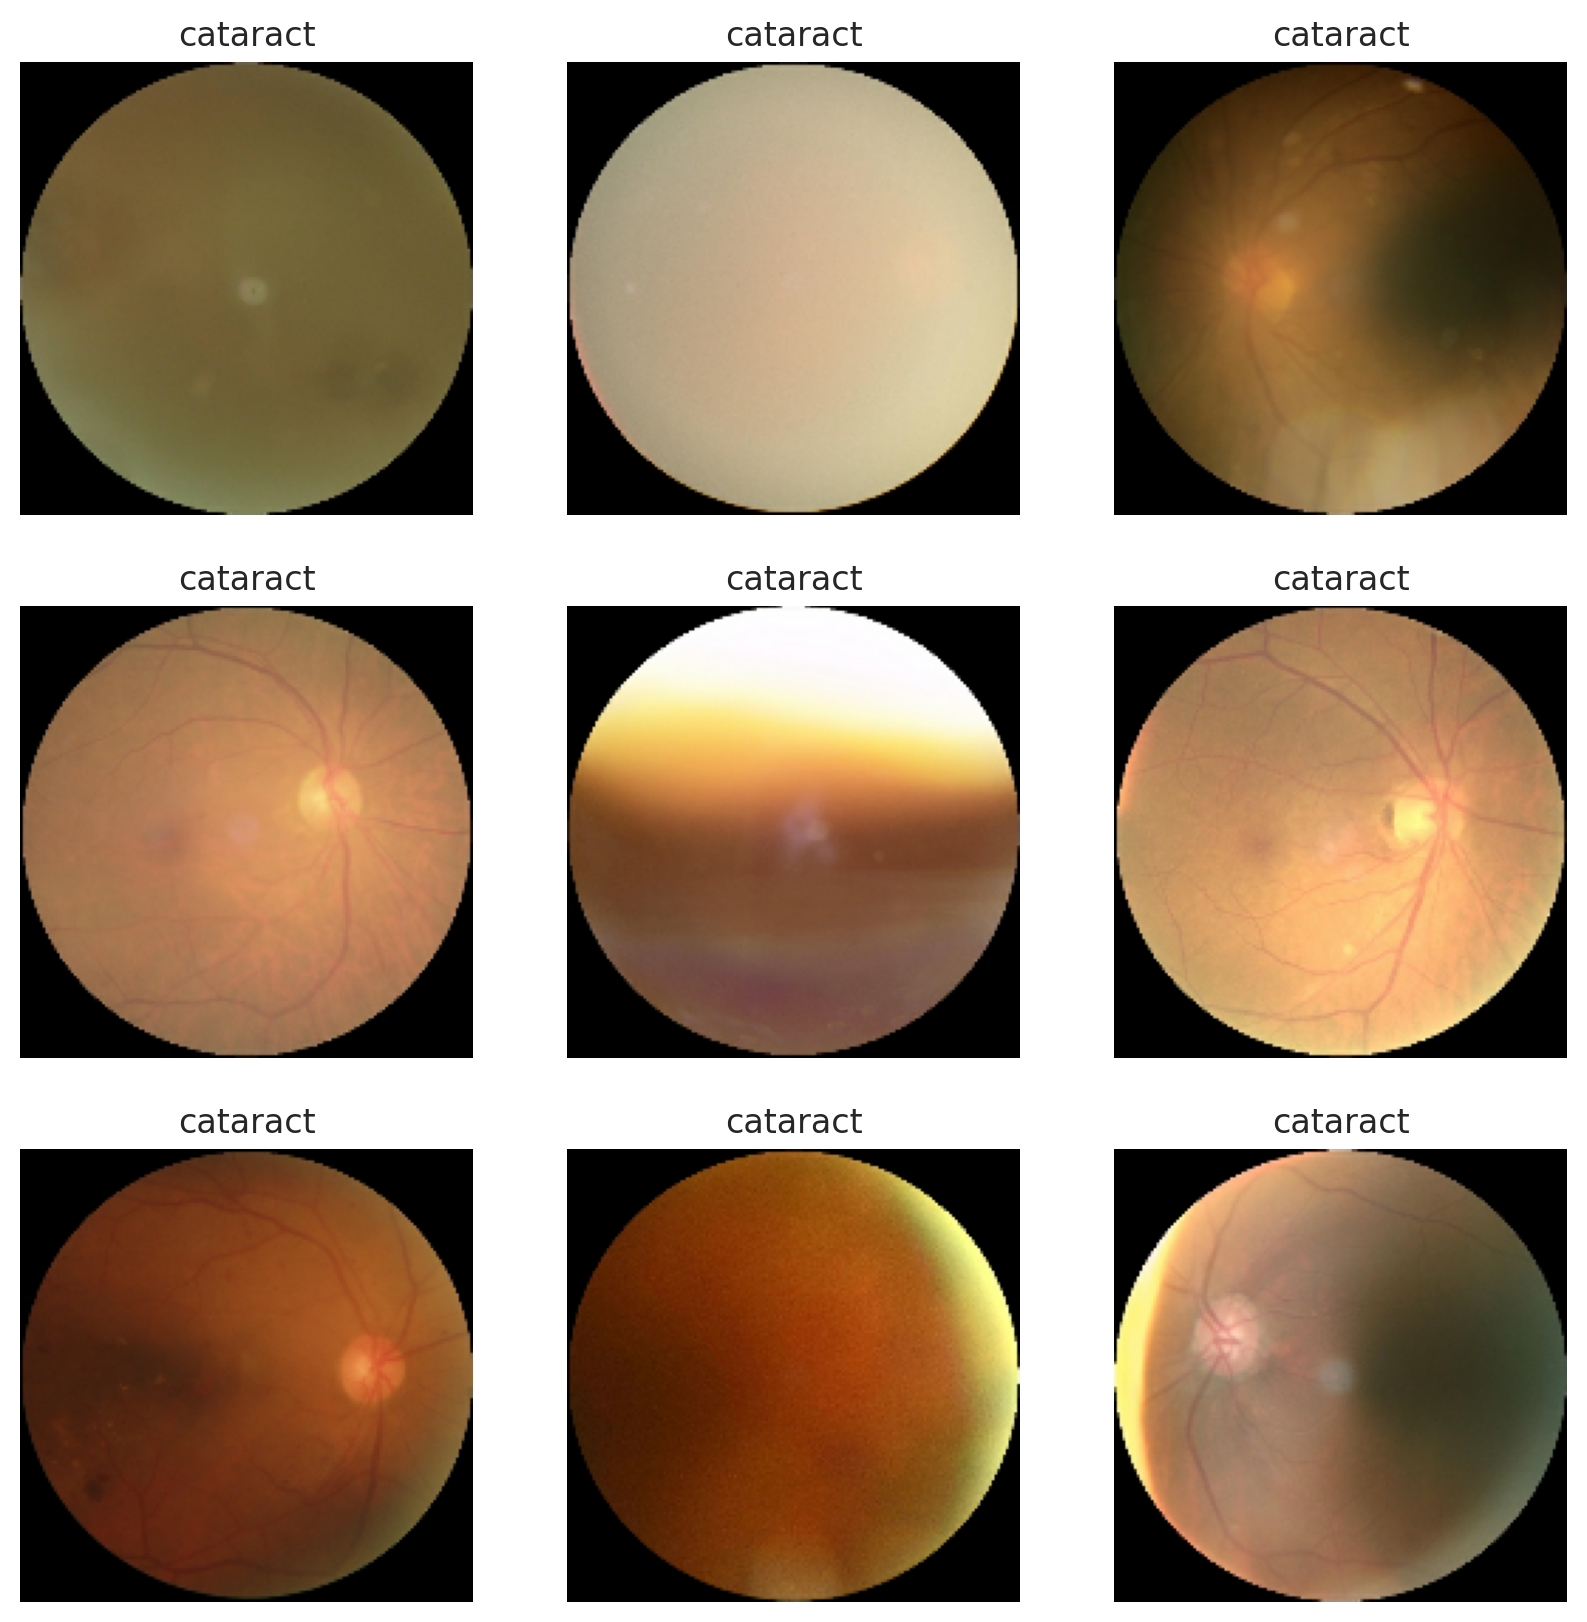

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

### **Visualise augmented images**

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(1):  # take a sample image from training set
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

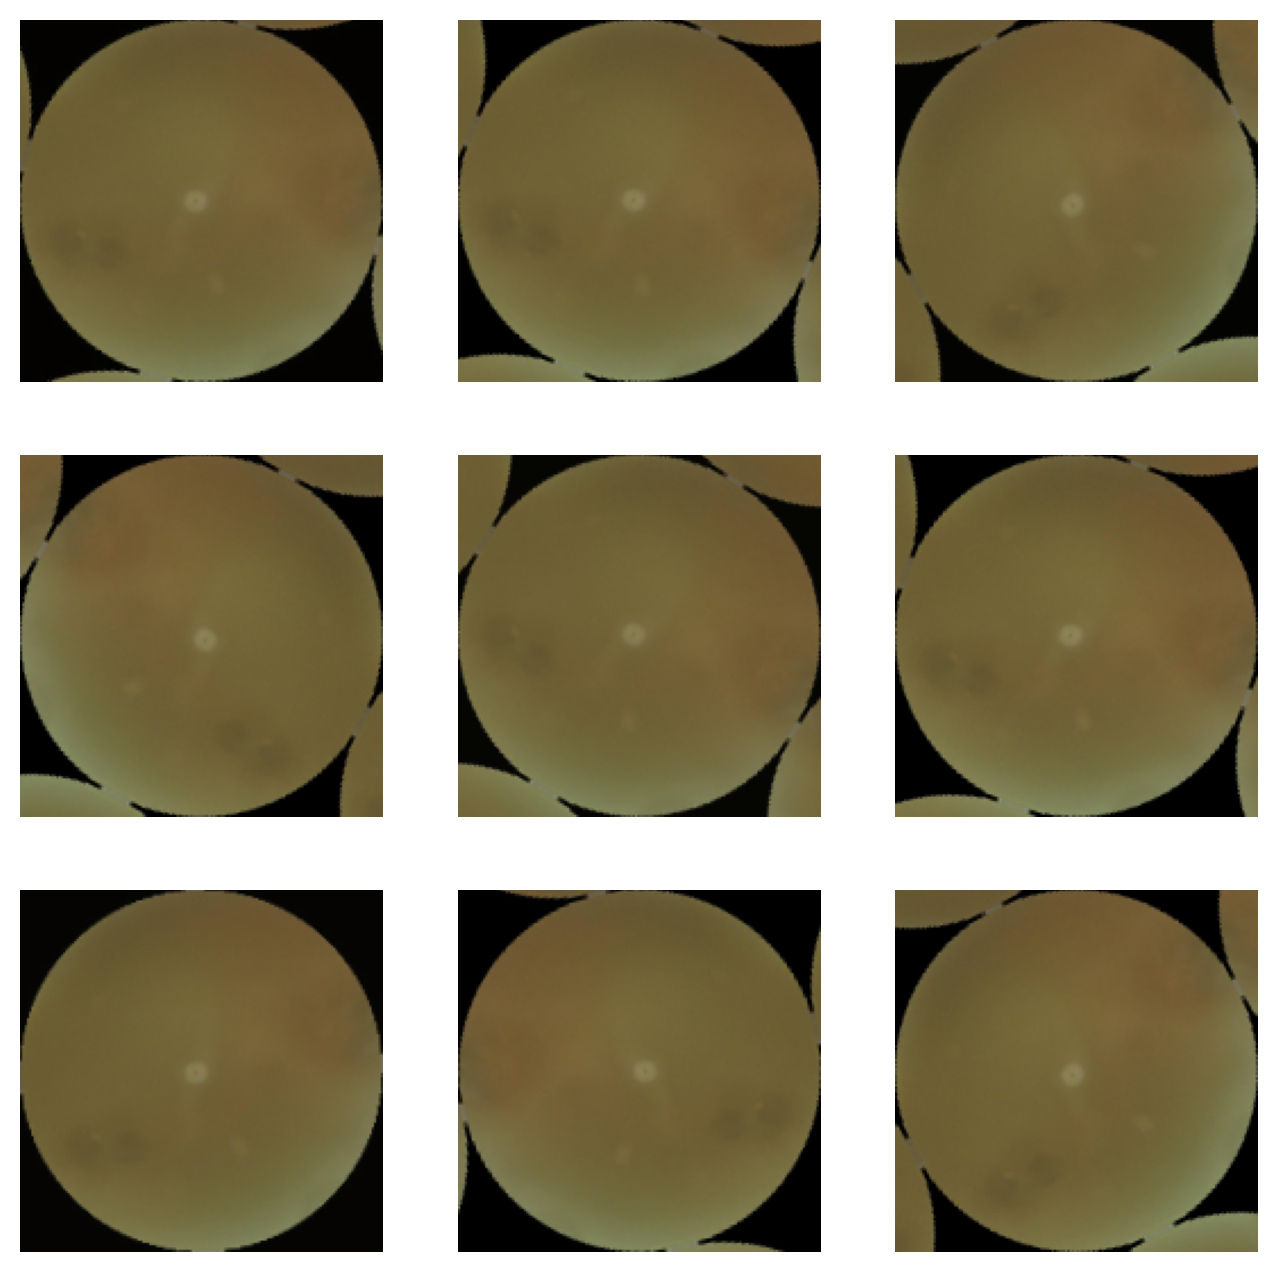

In [ ]:
augmented_img()

## **Create Base NasNetLarge model**



In [ ]:
import keras.backend as K # function to add F1 score as metric

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adamax, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

In [ ]:
# !pip install git+https://github.com/qubvel/classification_models.git

In [ ]:
# # for keras
# from classification_models.keras import Classifiers
# # for tensorflow keras
# from classification_models.tfkeras import Classifiers
# Classifiers.models_names()

In [ ]:
# Import necessary libraries
from classification_models.tfkeras import Classifiers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.python.keras import regularizers

In [ ]:
input_shape = (160, 160, 3)
base_model = tf.keras.applications.NASNetLarge(input_shape=input_shape,
                                                 include_top=False,
                                                 weights='imagenet',
                                                 pooling='max'
                                                 )
base_model.trainable=True # train entire model layers, yet with pre-trained weights from ImageNet

In [ ]:
# Create the base model from the pre-trained NASNetLarge model
def NasNetL():
  input_shape = (160, 160, 3)
  base_model = tf.keras.applications.NASNetLarge(input_shape=input_shape,
                                                 include_top=False,
                                                 weights='imagenet',
                                                 pooling='max'
                                                 )
  base_model.trainable=True # train entire model layers, yet with pre-trained weights from ImageNet
  x = base_model.output
  x = tf.keras.layers.Rescaling(1./255)(x) # rescaling layer
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
  x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
  x = Dropout(rate=.4, seed=123)(x)
  output = Dense(4, activation='softmax')(x)
  # instantiate model with added layers
  model=Model(inputs=base_model.input, outputs=output)
  model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=METRICS)
  return model

In [ ]:
model = NasNetL()

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 79, 79, 96)           2592      ['input_7[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 79, 79, 96)           384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_780 (Activation  (None, 79, 79, 96)           0         ['stem_bn1[0][0]']      

## **Compile, fit model, run**

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 100

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/NasNetLarge/NasNetLarge_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/NasNetLarge/NasNetLarge_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001)
]

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/100
66/66 [==============================] - 352s 3s/step - loss: 3.5533 - categorical_accuracy: 0.5403 - precision: 0.7157 - recall: 0.2699 - auc: 0.7580 - f1_score: 0.2924 - val_loss: 3073531.2500 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5032 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 2/100
66/66 [==============================] - 22s 327ms/step - loss: 1.7675 - categorical_accuracy: 0.6015 - precision: 0.6588 - recall: 0.5157 - auc: 0.8043 - f1_score: 0.5337 - val_loss: 1236814464.0000 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5032 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 3/100
66/66 [==============================] - 21s 326ms/step - loss: 2.1430 - categorical_accuracy: 0.4972 - precision: 0.4762 - recall: 0.3463 - auc: 0.7501 - f1_score: 0.3747 - val_loss: 19025657149259776.0000 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5

In [ ]:
input_shape = (160, 160, 3)
base_model = tf.keras.applications.NASNetMobile(input_shape=input_shape,
                                                 include_top=False,
                                                 weights='imagenet',
                                                 pooling='max'
                                                 )
base_model.trainable=True # train entire model layers, yet with pre-trained weights from ImageNet

19993432/19993432 [==============================] - 0s 0us/step


In [ ]:
# Create the base model from the pre-trained NASNetLarge model
def NasNetMobilE():
  input_shape = (160, 160, 3)
  base_model = tf.keras.applications.NASNetMobile(input_shape=input_shape,
                                                 include_top=False,
                                                 weights='imagenet',
                                                 pooling='max'
                                                 )
  base_model.trainable=True # train entire model layers, yet with pre-trained weights from ImageNet
  x = base_model.output
  x = tf.keras.layers.Rescaling(1./255)(x) # rescaling layer
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
  x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
  x = Dropout(rate=.4, seed=123)(x)
  output = Dense(4, activation='softmax')(x)
  # instantiate model with added layers
  model=Model(inputs=base_model.input, outputs=output)
  model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=METRICS)
  return model

In [ ]:
model = NasNetMobilE()

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 79, 79, 32)           864       ['input_9[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 79, 79, 32)           128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_1228 (Activatio  (None, 79, 79, 32)           0         ['stem_bn1[0][0]']      

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 100

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/NasNetMobile/NasNetMobile_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/NasNetMobile/NasNetMobile_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001)
]

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/100
66/66 [==============================] - 244s 2s/step - loss: 4.4087 - categorical_accuracy: 0.4680 - precision: 0.4763 - recall: 0.3430 - auc: 0.6358 - f1_score: 0.4323 - val_loss: 8.1776 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.4970 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 2/100
66/66 [==============================] - 11s 168ms/step - loss: 2.1135 - categorical_accuracy: 0.4383 - precision: 0.4917 - recall: 0.2106 - auc: 0.7001 - f1_score: 0.2555 - val_loss: 45.1322 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5032 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 3/100
66/66 [==============================] - 11s 170ms/step - loss: 1.8712 - categorical_accuracy: 0.4051 - precision: 0.3819 - recall: 0.1817 - auc: 0.6885 - f1_score: 0.2271 - val_loss: 24.8211 - val_categorical_accuracy: 0.2462 - val_precision: 0.2462 - val_recall: 0.2462 - val_auc: 0.4979 - val_f1_score: 0.2457 - 

## **Learning Curves**

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NasNetMobile/NasNetMobile_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.635816              0.468038  0.432346  4.408741   0.476274   
1      1  0.700078              0.438330  0.255460  2.113510   0.491694   
2      2  0.688450              0.405123  0.227068  1.871209   0.381854   

     recall   val_auc  val_categorical_accuracy  val_f1_score   val_loss  \
0  0.343038  0.497044                  0.254753      0.257576   8.177592   
1  0.210626  0.503169                  0.254753      0.257576  45.132240   
2  0.181689  0.497935                  0.246198      0.245671  24.821133   

   val_precision  val_recall  
0       0.254753    0.254753  
1       0.254753    0.254753  
2       0.246198    0.246198

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

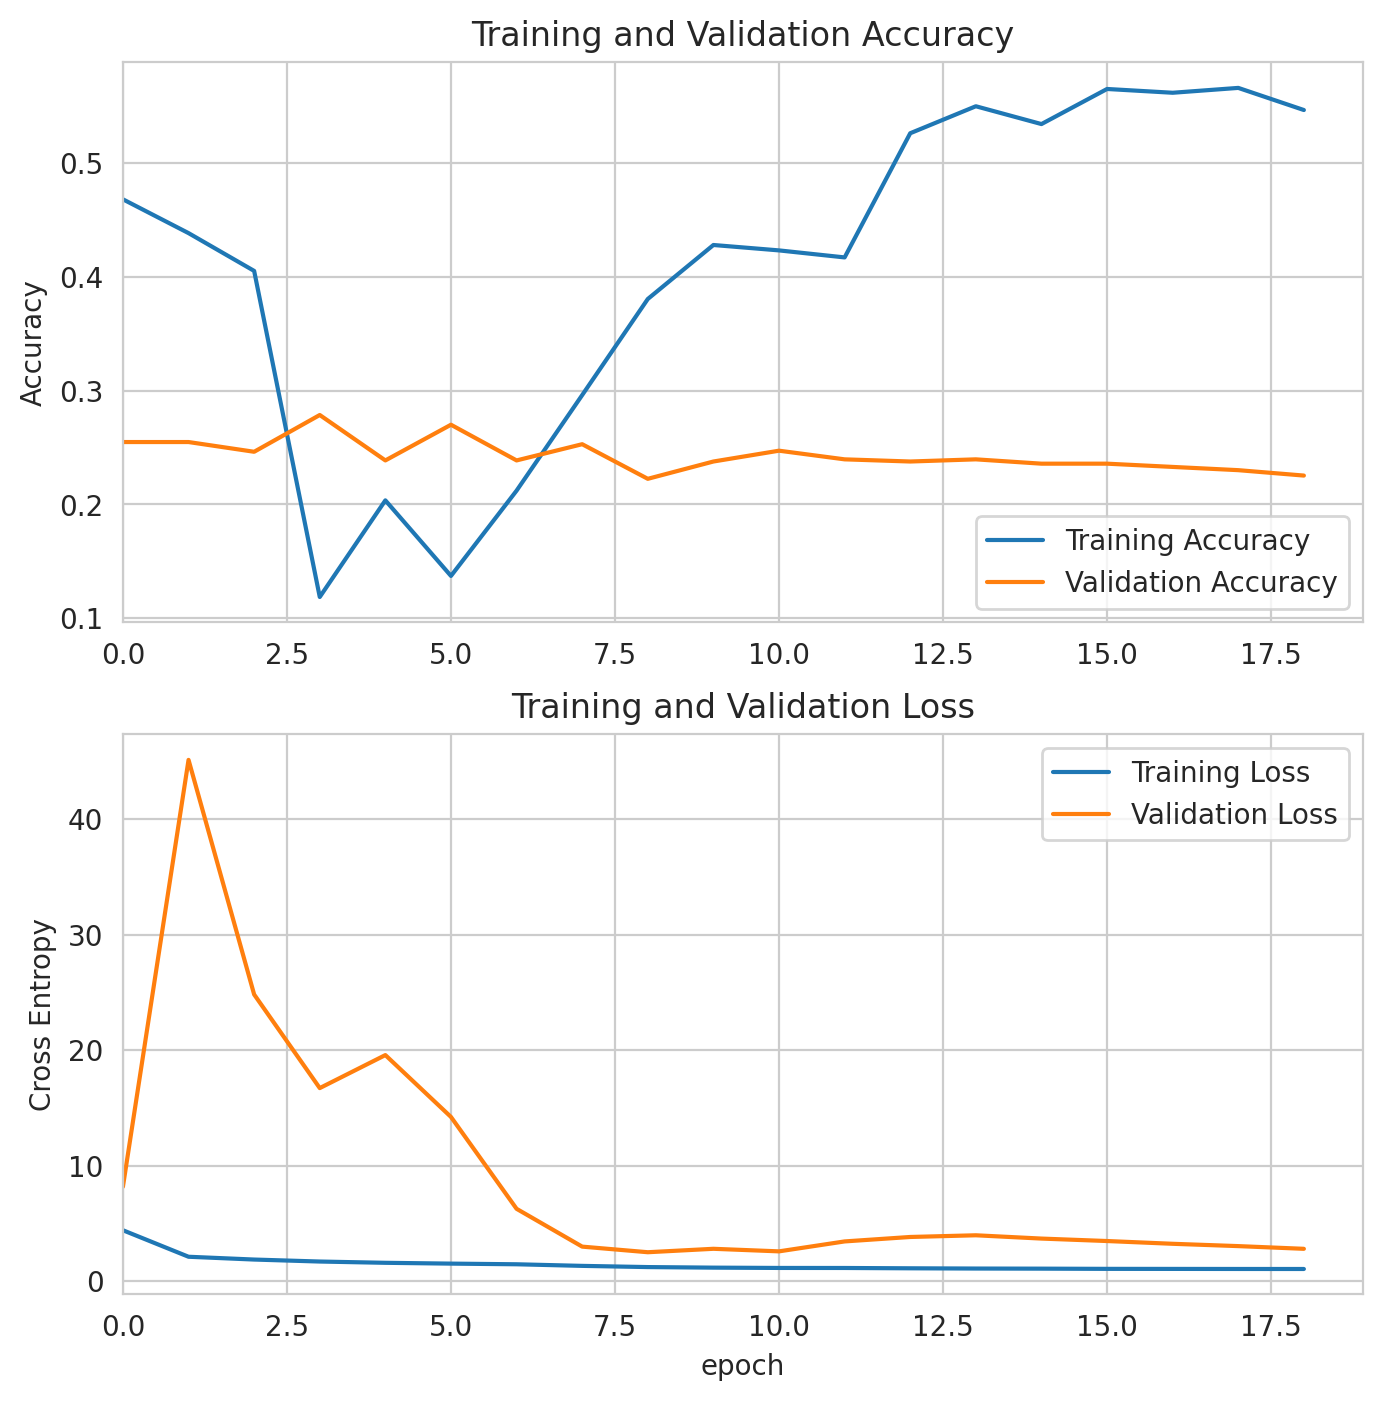

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# best epoch if based solely on best validation loss
metrics(epoch_num=8) # record epoch 9 as 8

AUC percentage difference is: 34.11988265248828 %

Accuracy percentage difference is: 41.53494467515776 %


Best base NasNetLarge model (**epoch 09**) has the following validation metrics:

| Name               |   Scores   |
|:-------------------|:----------:|
|AUC                 |0.7309|
|Categorical Accuracy|0.3805|
|F1 score            |0.2470|
|Loss                |1.2198|
|Precision           |0.9901|
|Recall              |0.2381|


## **Evaluation**

**using test dataset**



In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NasNetMobile/NasNetMobile_ep9_val2.505",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 14s 61ms/step
[0.24946405 0.02510186 0.24010098 0.4853331 ]
cataract probability is: 0.2495
diabetic_retinopathy probability is: 0.0251
glaucoma probability is: 0.2401
normal probability is: 0.4853

===== train_ds predictions =====
66/66 [==============================] - 4s 65ms/step
[[0.42189333 0.04234391 0.19613478 0.33962792]]
cataract probability is: 0.4219
diabetic_retinopathy probability is: 0.0423
glaucoma probability is: 0.1961
normal probability is: 0.3396

===== val_ds predictions =====
33/33 [==============================] - 2s 53ms/step
[[0.30864108 0.02232223 0.14803725 0.5209995 ]]
cataract probability is: 0.3086
diabetic_retinopathy probability is: 0.0223
glaucoma probability is: 0.1480
normal probability is: 0.5210


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.2413807  0.26543614 0.24946405]


##### **OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Predicted val_ds labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

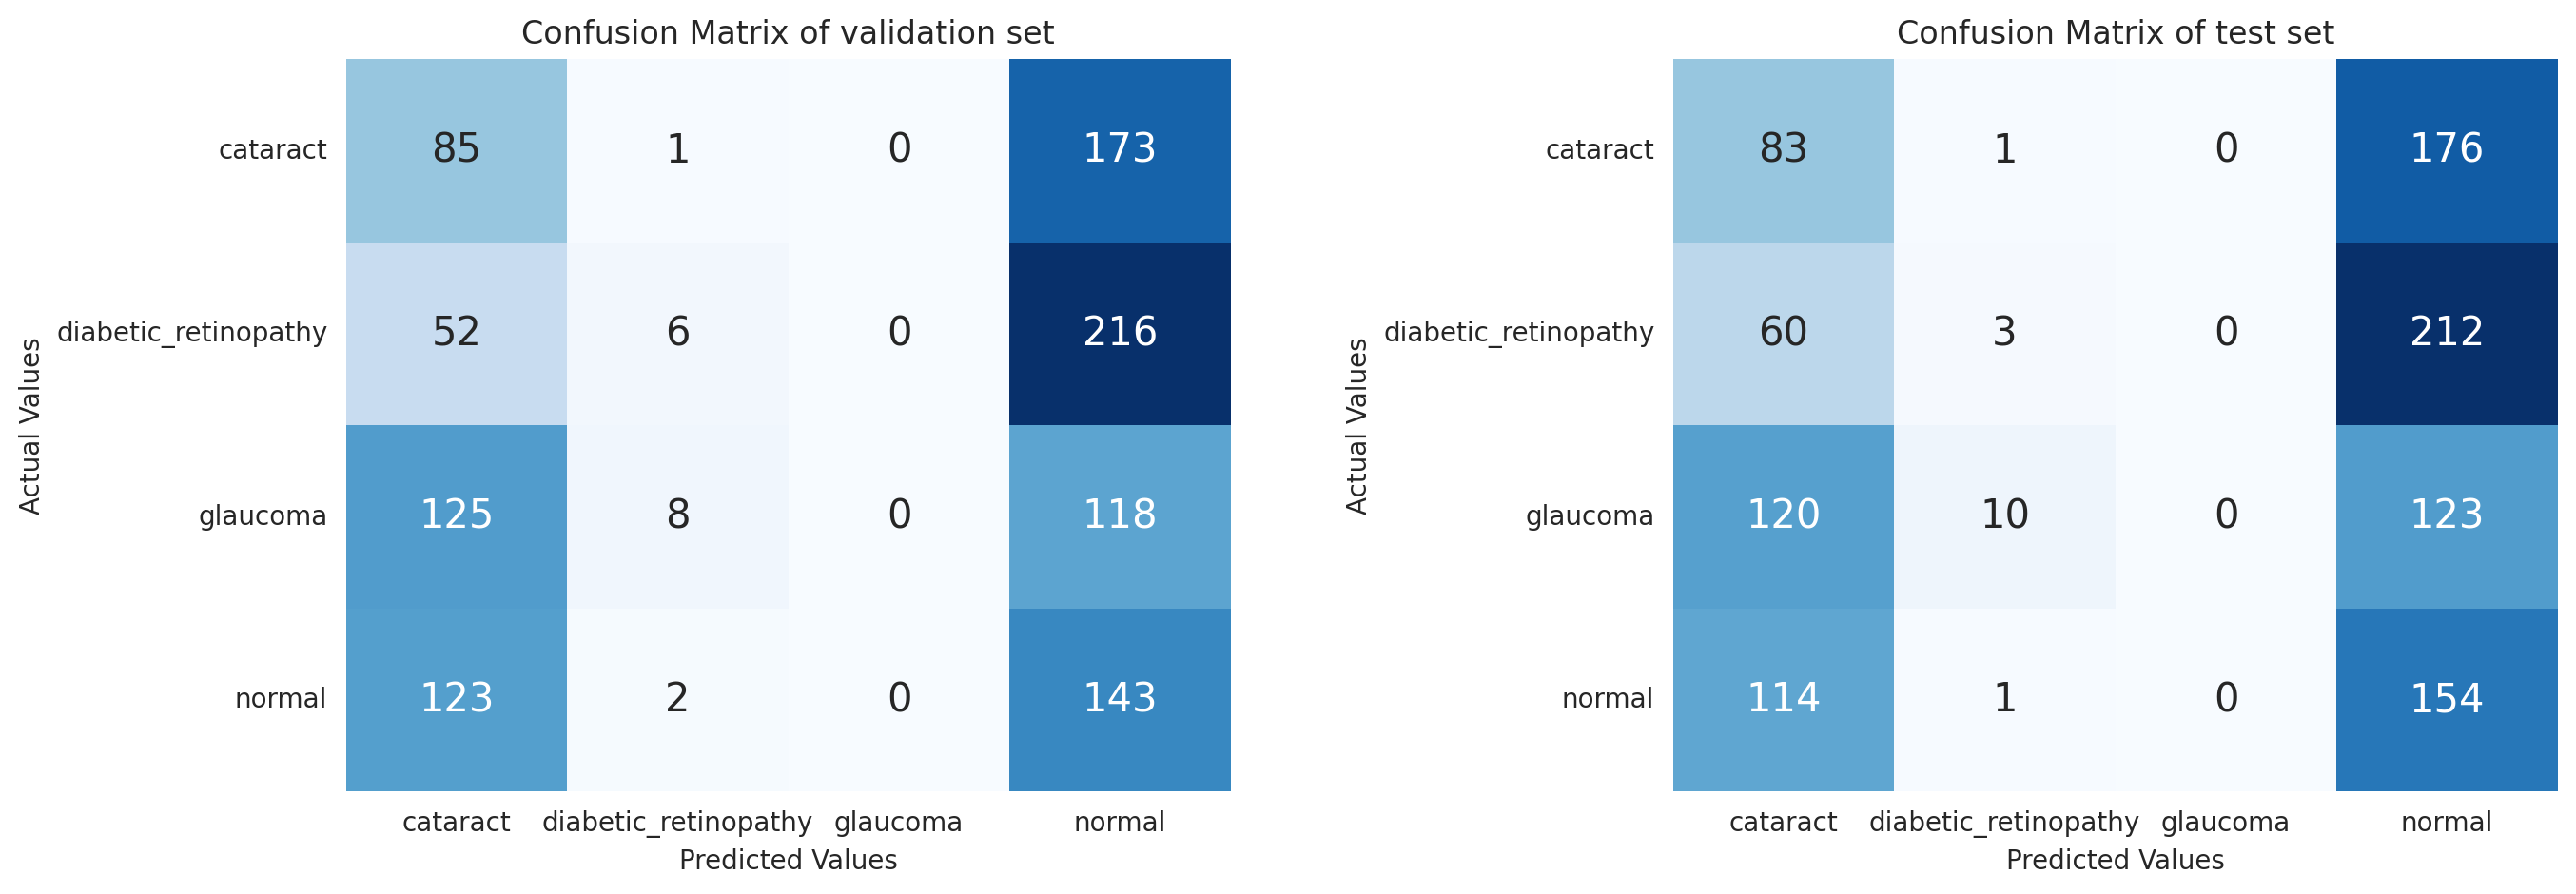

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.2202    0.3192    0.2606       260
diabetic_retinopathy     0.2000    0.0109    0.0207       275
            glaucoma     0.0000    0.0000    0.0000       253
              normal     0.2316    0.5725    0.3298       269

           micro avg     0.2271    0.2271    0.2271      1057
           macro avg     0.1629    0.2257    0.1528      1057
        weighted avg     0.1651    0.2271    0.1534      1057
         samples avg     0.2271    0.2271    0.2271      1057



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [3 3 3 3 3]


In [ ]:
len(error_list)

817

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 22.705771050141905 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'normal',
  0.47968334,
  './work_directory/test/cataract/103_left.jpg'),
 ('cataract',
  'normal',
  0.52247494,
  './work_directory/test/cataract/1084_right.jpg'),
 ('cataract',
  'normal',
  0.4853331,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'normal',
  0.42543477,
  './work_directory/test/cataract/112_right.jpg'),
 ('cataract',
  'normal',
  0.43470258,
  './work_directory/test/cataract/1164_left.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/103_left.jpg           cataract             normal         0.4797
    2        cataract/1084_right.jpg          cataract             normal         0.5225
    3         cataract/1102_left.jpg          cataract             normal         0.4853
    4         cataract/112_right.jpg          cataract             normal         0.4254
    5         cataract/1164_left.jpg          cataract             normal         0.4347
    6         cataract/119_left.jpg           cataract             normal         0.5376
    7        cataract/1415_right.jpg          cataract             normal         0.4150
    8         cataract/1435_left.jpg          cataract             normal         0.3861
    9         cataract/188_right.jpg          cataract             normal         0.4724
    10       cataract/2074_right.jpg          

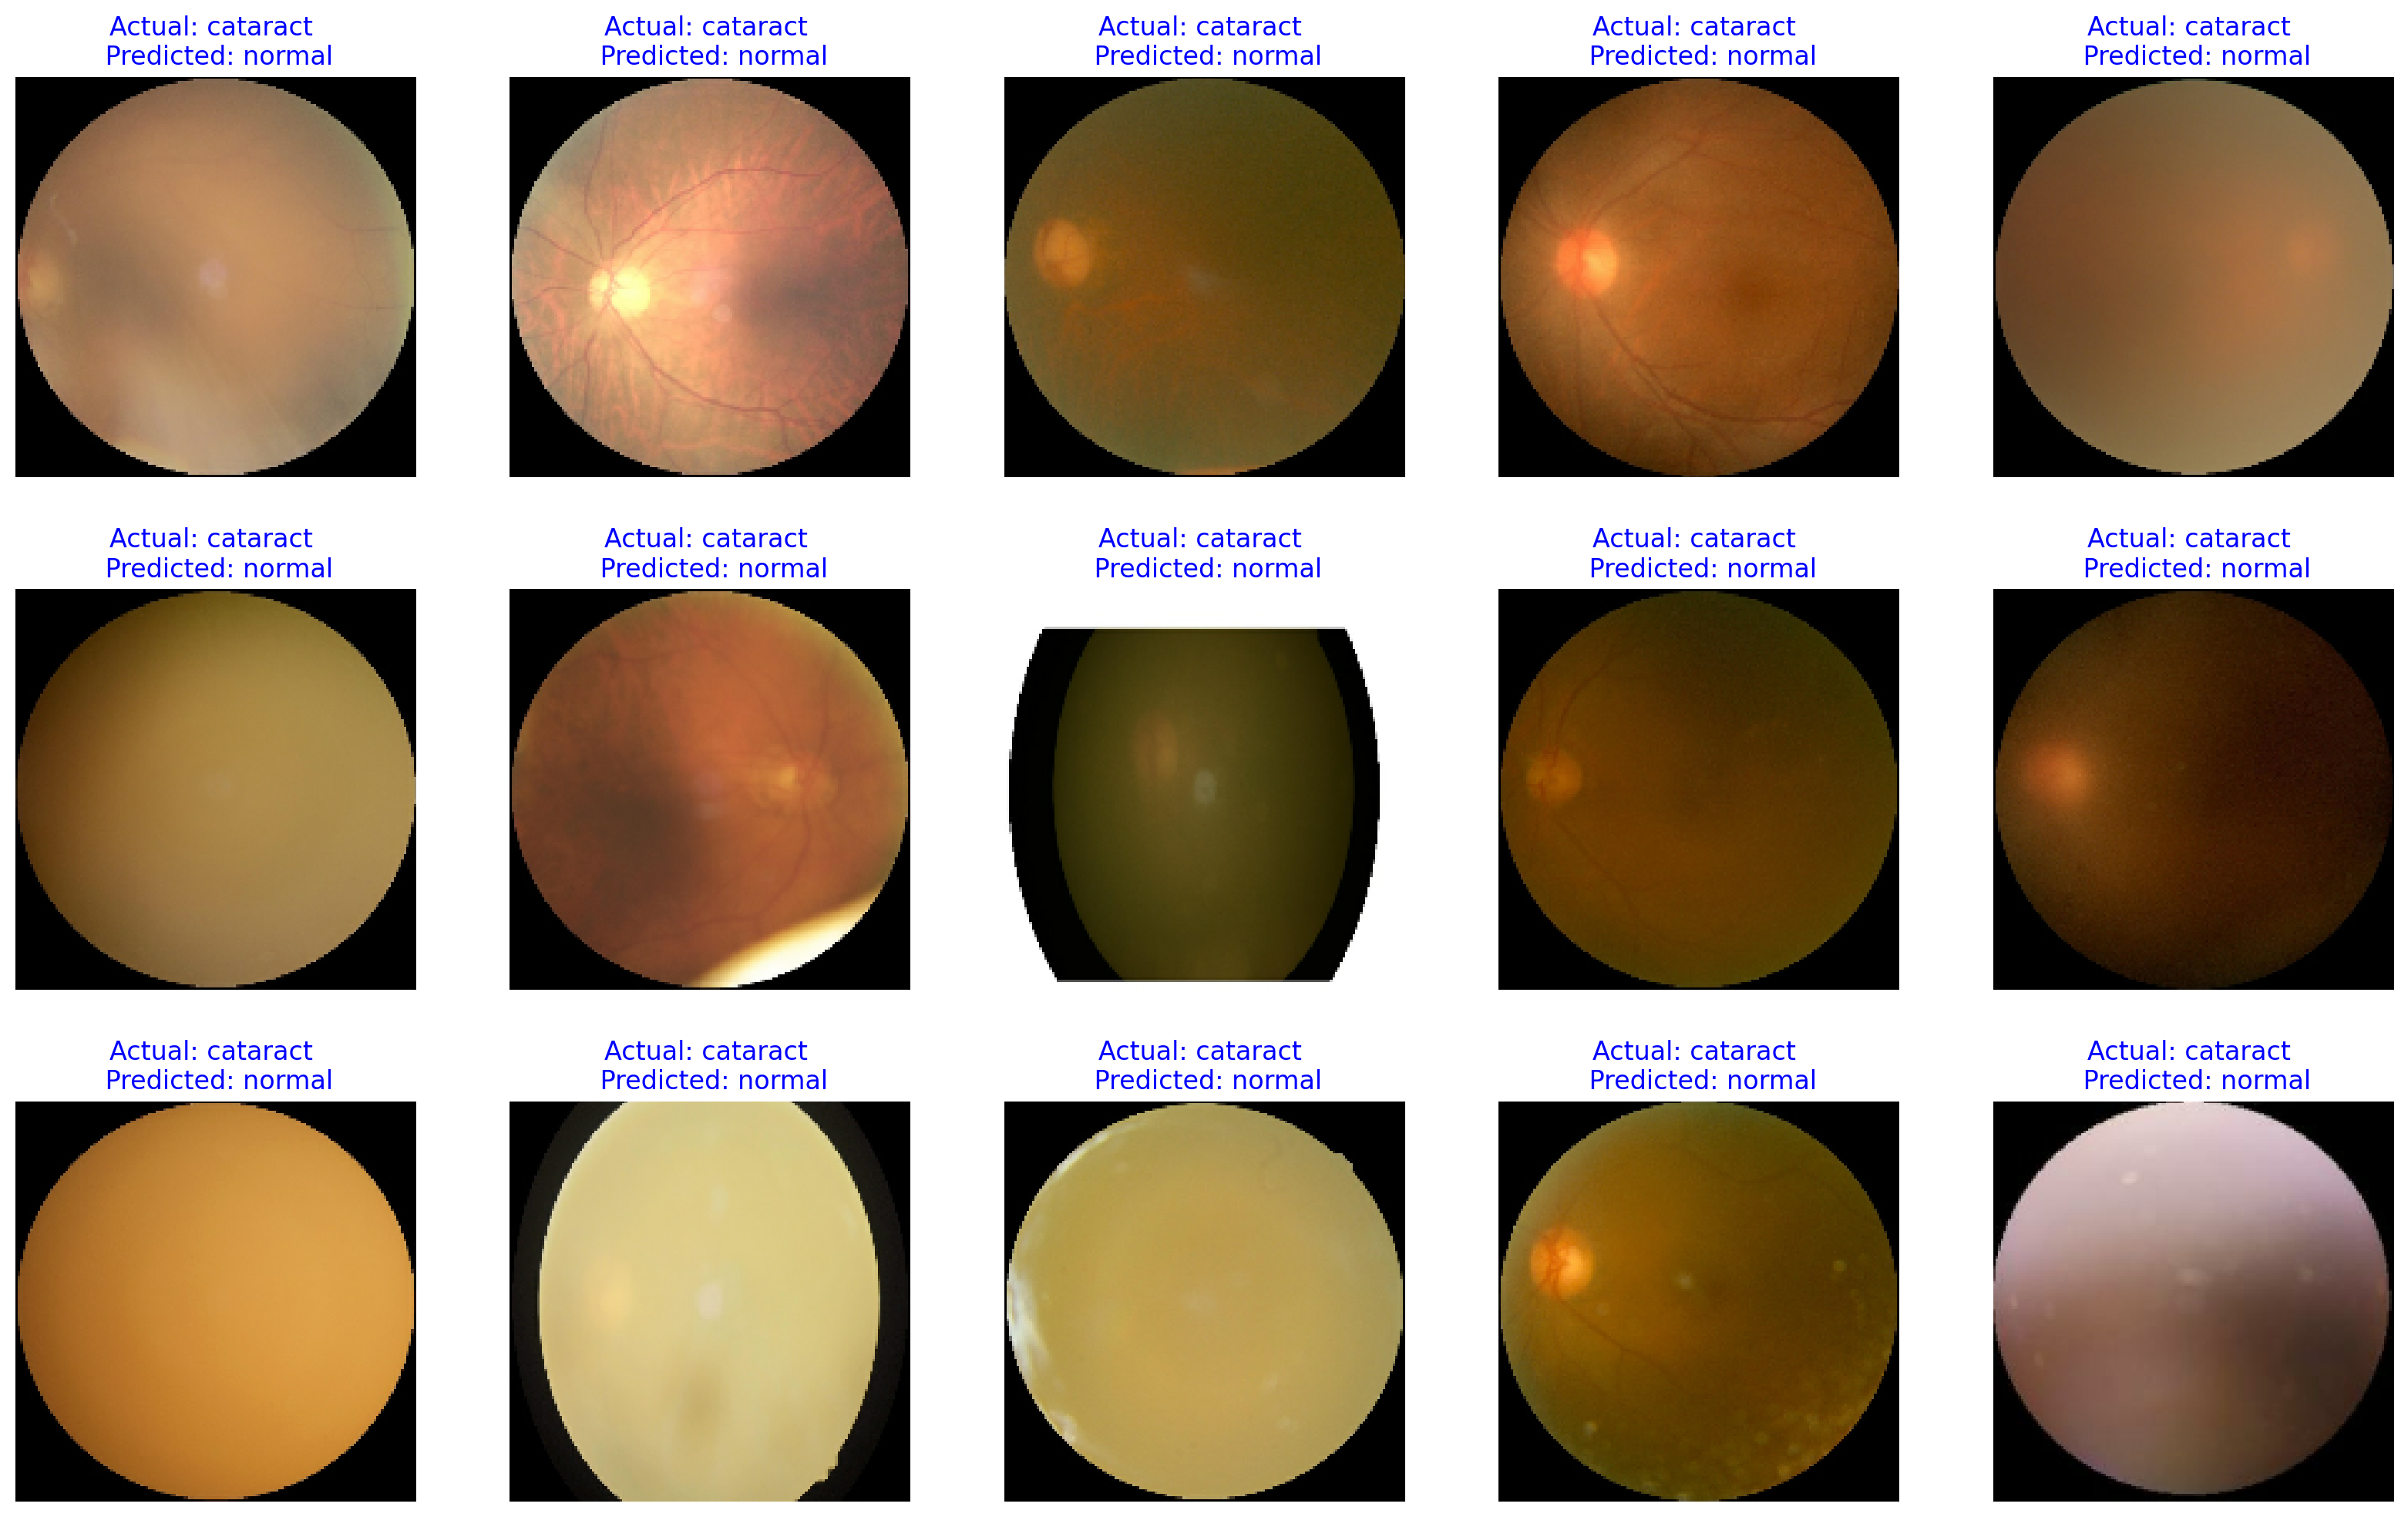

In [ ]:
# to display examples of each class that was wrongly classified
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r,c,i):
  axes[r,c].imshow(test_images[i].astype('uint8'))
  axes[r,c].axis('off')
  axes[r,c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

axes_img(r=0,c=0,i=0)  # first row - actual cataract
axes_img(r=0,c=1,i=5)
axes_img(r=0,c=2,i=10)
axes_img(r=0,c=3,i=15)
axes_img(r=0,c=4,i=20)

axes_img(r=1,c=0,i=23) # 2nd row - actual glaucoma
axes_img(r=1,c=1,i=29)
axes_img(r=1,c=2,i=35)
axes_img(r=1,c=3,i=42)
axes_img(r=1,c=4,i=48)

axes_img(r=2,c=0,i=50) # 3rd row - actual normal
axes_img(r=2,c=1,i=54)
axes_img(r=2,c=2,i=62)
axes_img(r=2,c=3,i=68)
axes_img(r=2,c=4,i=73)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()